In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
sampleData = pd.read_csv("/home/jayantm/Batches/Batch41/Uber01/SampleData/part-00000",  names = ['date', 'latitude', 'longitude', 'baseLLC'])

In [3]:
sampleData.head(4)

,date,latitude,longitude,baseLLC
0,12/1/2016 3:28:00,40.7623,-73.9797,B02512
1,12/1/2016 7:13:00,40.7434,-73.9742,B02512
2,12/1/2016 7:13:00,40.7430,-73.9794,B02512
3,12/1/2016 8:42:00,40.8073,-74.2178,B02512


In [4]:
columns = ['longitude', 'latitude']
featuresData = pd.DataFrame(sampleData, columns=columns)

In [5]:
### For the purposes of this example, we store feature data from our
### dataframe `featuresData`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = featuresData['longitude'].values
f2 = featuresData['latitude'].values
X=np.matrix(zip(f1,f2))


In [6]:
X=X[:100]

In [7]:
X

matrix([[-73.9797,  40.7623],
        [-73.9742,  40.7434],
        [-73.9794,  40.743 ],
        [-74.2178,  40.8073],
        [-73.9789,  40.7576],
        [-73.7899,  40.6462],
        [-73.9733,  40.7616],
        [-74.1792,  40.6894],
        [-73.9805,  40.7644],
        [-73.9805,  40.7715],
        [-73.9979,  40.7204],
        [-73.9747,  40.7633],
        [-73.9683,  40.7707],
        [-73.9531,  40.7722],
        [-73.9741,  40.7831],
        [-73.9819,  40.7753],
        [-74.0085,  40.7236],
        [-73.997 ,  40.7254],
        [-74.0075,  40.7168],
        [-73.9753,  40.7529],
        [-73.9742,  40.7571],
        [-73.9812,  40.7703],
        [-74.1842,  40.6891],
        [-73.9843,  40.77  ],
        [-74.0057,  40.7257],
        [-73.9858,  40.7573],
        [-74.1777,  40.6953],
        [-73.9894,  40.7381],
        [-73.997 ,  40.7563],
        [-74.0091,  40.7312],
        [-73.9626,  40.7704],
        [-73.996 ,  40.7673],
        [-73.9888,  40.7222],
        [-

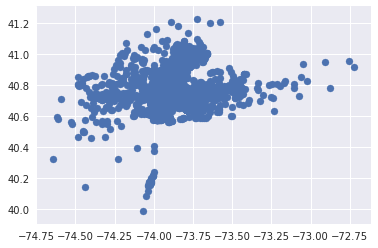

In [8]:
## Draw a scatter plot with above features
plt.scatter(f1,f2)
plt.show()

In [9]:
K = range(1,20)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [10]:
## Find with in sum of squared error
from scipy.spatial.distance import cdist, pdist

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
#cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
sumWithinSS = [sum(d) for d in dist]

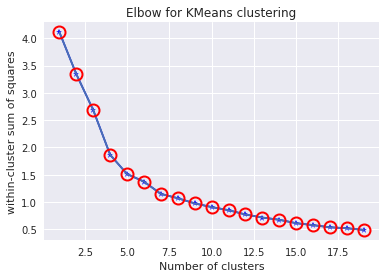

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, sumWithinSS, 'b*-')
ax.plot(K, sumWithinSS, marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [12]:
sumWithinSS

[4.1124442261062448,
 3.3434112843046071,
 2.6847770589138782,
 1.8652942599921538,
 1.5114186861861971,
 1.3726447852373362,
 1.1474979962804808,
 1.0682126786079822,
 0.97300014722419881,
 0.90550252195033343,
 0.84884148860611341,
 0.76987249725776374,
 0.71384813368162148,
 0.67283998000328393,
 0.61037553391767618,
 0.5746978134415387,
 0.53468277780933549,
 0.51778420185914353,
 0.48667938714706521]